# 1장 파이썬 입문
파이토치를 사용한 딥러닝 프로그래밍에서 중요한 개념을 위주로 설명한다.

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [ ]:
# !sudo apt-get install -y fonts-nanum* | tail -n 1
# !sudo fc-cache -fv
# !rm -rf ~/.cache/matplotlib

[sudo] rokey 암호: 
sudo: 암호가 필요합니다
^C
[sudo] rokey 암호: 

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

import platform


# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [50]:
import torch

In [51]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 컨테이너 타입 변수에 주의
파이썬에서 변수는 단지 실제 데이터 구조로 향하는 포인터에 지나지 않는다.
넘파이 배열 등에서는 이 점을 의식하지 않으면 생각지도 못한 결과를 초래하는 경우가 있다.

### 넘파이 변수 간

In [20]:
# 넘파이 배열 x를 정의
x = np.array([5, 7, 9])

# 변수 y에 x를 대입
y = x

# 결과 확인
print(x)
print(y)

[5 7 9]
[5 7 9]


In [21]:
# x의 특정 요소를 변경
x[1] = -1

# y도 따라서 값이 바뀜
print(x)
print(y)

[ 5 -1  9]
[ 5 -1  9]


In [22]:
# y도 동시에 변하면 안되는 경우는, 대입 시 copy 함수를 이용함
x = np.array([5, 7, 9])
y = x.copy()

# x의 특정 요소 값이 변해도, y에는 영향이 없음
x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


### 텐서와 넘파이 변수 간



- x1=   딥러닝 연산을 위한 텐서(PyTorch)
- x2 = 일반 수치 연산용 배열 (Numpy)

1. 서로 목적이 다름 
2. 연산 성격이 다름 
3. 메모리를 공유함 => x2를 수정하면 x1도 함께 수정가능 

In [23]:
import torch

# x1: shape=[5]가 되는 모든 값이 1인 텐서
x1 = torch.ones(5)

# 결과 확인
print(x1)

# x2: x1로부터 생성한 넘파이 배열
x2 = x1.data.numpy()

# 결과 확인
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [24]:
# x1의 값을 변경
x1[1] = -1

# x2의 값도 같이 변함
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [25]:
# 안전한 방법

# x1: 텐서
x1 = torch.ones(5)

# x2: x1를 copy한 넘파이
x2 = x1.data.numpy().copy()

x1[1] = -1

# 결과 확인
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


## 파이썬 자료의 구조 (Container Objects)
* 리스트(list), 튜플(tuple), 사전(dict)

In [26]:
a = 12
b = 12.55

print("type(a) = ", type(a)) # 32 bit/ 4 Byte
print("type(b) = ", type(b)) # 64 bit/ 8 Byte

type(a) =  <class 'int'>
type(b) =  <class 'float'>


In [27]:
## 리스트
price = [10000, 3000, 12000]

#list indexing
print("price[0] = ", price[0])

#list slicing
print("price[0:2] = ", price[0:2])

price[0] =  10000
price[0:2] =  [10000, 3000]


In [28]:
fruit = ['apple', 'banana', 'orange']

print("type(fruit) = ", type(fruit))
#list indexing
print("fruit[0] = ", fruit[1])

#list slicing
print("fruit[1:2] = ", fruit[1:2])

type(fruit) =  <class 'list'>
fruit[0] =  banana
fruit[1:2] =  ['banana']


In [29]:
## 튜플 (Tuple)
tup = ('apple', 'banana', 'watermelon', 'cucumber')
print("type(tup) = ", type(tup))

print(tup)

tup[0] = "mango" # TypeError: 'tuple' object does not support item assignment

type(tup) =  <class 'tuple'>
('apple', 'banana', 'watermelon', 'cucumber')


TypeError: 'tuple' object does not support item assignment

In [ ]:
## 딕셔너리 (Dictionary)
# * 자료에 접근할 때 'key' 값을 이용해서 접근

flower_price ={
    'rose': 10000,
    'iris': 3000,
    'stargauge': 12000,
    'lily': 9000,
    'daffodil': 3000
}

print(flower_price, '\n')

## 딕셔너리 접근하기
print(flower_price.items(), '\n') # tuple로 반환
print(flower_price.keys(), '\n')
print(flower_price.values(), '\n')

flower_price['daisy'] = flower_price.pop('iris')
flower_price

In [ ]:
fruit_price={}
print(type(fruit_price))

fruit_price['apple'] = 1000

print(fruit_price)

## access dictionary data
print("fruit_price['apple'] = \n", fruit_price['apple'])

##  if 조건문

In [ ]:
# 만약 condition 이 True 이면 code 1 을 수행, False 이면 code 2를 수행
# if condition:
#      code 1
#  else:
#      code 2
#

rose = 1500

if rose < 1000: #Boolean index:
    print('장미꽃을 구매합니다')
else:
    print('나리꽃을 구매합니다')

In [ ]:
rose = 1500

if rose < 1000: #Boolean index:
    print('장미꽃을 구매합니다')
elif rose < 2000: #
    print('꽃구매를 기다립니다')
else:
    print('나리꽃을 구매합니다')

## for 구문

In [ ]:
# for 변수 in 리스트(또는 튜플, 문자열):
#     수행할_문장1
#     수행할_문장2
#     ...

for i in range(10):
    print(i)

In [ ]:
## Using string
flowers = ['장미', '백합', '붓꽃', '해바라기']

for i in flowers:
    print(i)

In [ ]:
## Using index

flowers = ['장미', '백합', '붓꽃', '해바라기', '후리지아']

for i in [0,1,2,3]:
    print(flowers[i])

## while 반복문 

In [ ]:
# 초기식
# while 조건식:
#      반복할 코드
#      변화식


In [ ]:
#매일 10%씩 가격이 오를 때의 가격 
rose = 1000
day = 1

while day <= 10:
    rose = rose + rose*0.1
    print(round(rose, 3), ", day = ", day)
    day += 1

1100.0 , day =  1
1210.0 , day =  2
1331.0 , day =  3
1464.1 , day =  4
1610.51 , day =  5
1771.561 , day =  6
1948.717 , day =  7
2143.589 , day =  8
2357.948 , day =  9
2593.742 , day =  10


## 파이썬 함수만들기

In [ ]:
# 함수정의 기본 문법
# def 함수 이름:
#     함수 내용

# 함수 호출
def myfunction(): # 함수 이름
    print("Hello World") # 함수 내용

myfunction() # 함수 호출


In [ ]:
# 합을 구하는 함수
def addNum(num1: int, num2: int) -> float:
    sum = num1 + num2
    return float(sum)

result = addNum(10, 2)
print("result = ", result)
print("result = ", type(result))

result =  12.0
result =  <class 'float'>


In [ ]:
## 여러 개의 값 반환하기
def add_sub(num1, num2):
    add = num1 + num2
    sub = num1 - num2
    return add, sub

add_sub(1, 2) # tuple로 반환
x = add_sub(3, 4)  # tuple로 반환
print('x = ', x)

add, sub = add_sub(3, 4)
print("add = {}, sub = {}".format(add, sub))

In [ ]:
## 함수내 함수호출, stack 구조
def mul(a, b):
    return a*b

def divide(a, b):
    return a/b

def mul_div(x, y):
    num1 = mul(x, y)
    num2 = divide(x, y)
    return num1, num2

result = mul_div(2, 1)
print('result = ', result)

## 합성 함수를 파이썬으로 구현하기
수학에서 합성함수가 파이썬에서 어떻게 구현되는지 확인한다.

$f(x) = 2x^2 + 2$를 함수로 정의한다.

In [31]:
def f(x):
    return (2 * x**2 + 2)

In [32]:
# 넘파이 배열로 x를 정의

import numpy as np
x = np.arange(-2, 2.1, 0.25)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [33]:
# f(x)의 결과를 y에 대입

y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

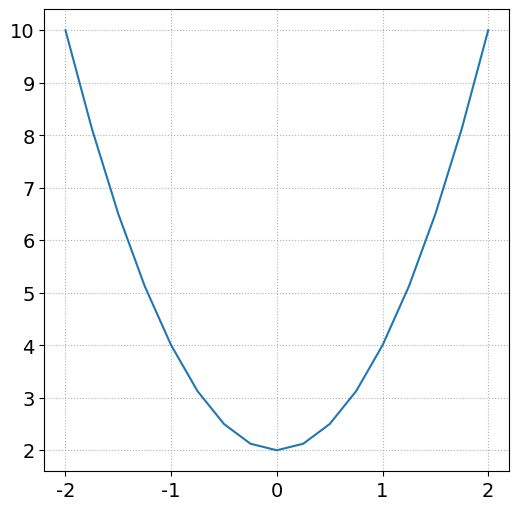

In [34]:
# 함수를 그래프로 그리기

plt.plot(x, y)
plt.show()

In [35]:
# 세 가지 기본 함수의 정의

def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

# 합성 함수 만들기

x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

In [36]:
# 합성 함수 값 확인

print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

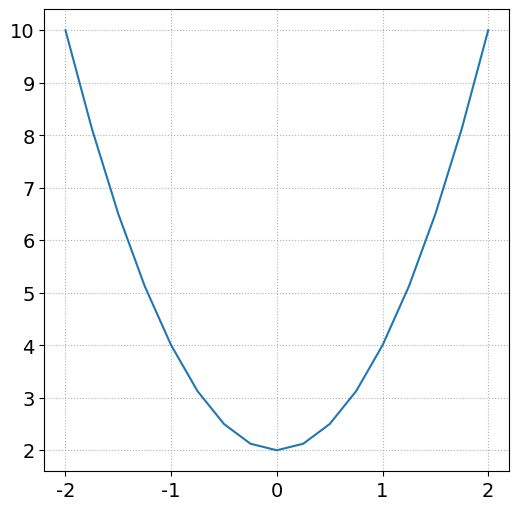

In [52]:
# 합성 함수 그래프 그리기

plt.plot(x, y)
plt.show()

## 커스텀 클래스 정의하기

In [ ]:
## 합, 차 함수
def add(a, b):
    return a + b

def sub(a, b):
    return a - b

a, b = 1, 2
print("a + b = ", add(a, b))
print("a - b = ", sub(a, b))

In [38]:
## class 만들기 : 비슷한 기능들을 한 번에 관리
class Calculator:
    def __init__(self, a:int, b:int): #__init__ 자동호출 
        self.result = 0 #클래스 속성 
        self.a = a 
        self.b = b

    def add(self):
        self.result = self.a + self.b
        return self.result

    def sub(self):
        self.result = self.a - self.b
        return self.result


In [39]:
calculator = Calculator(3, 2)
print("add = ", calculator.add())
print("sub = ", calculator.sub())

add =  5
sub =  1


In [ ]:
## 상속
class CalculatorV2(Calculator):
    def __init__(self, x, y, c):
        super().__init__(x, y)  #상속 
        self.c = c

    def mul(self):
        self.result = self.a * self.b
        return self.result

    def div(self):
        self.result = self.a / self.b
        return self.result

    # def __str__(self):
    #     return str(self.c)



In [41]:
calculator2 = CalculatorV2(10, 2, 1)

print(calculator2.add())
print(calculator2.sub())
print(calculator2.mul())
print(calculator2.div())

12
8
20
5.0


In [42]:
# 그래프 출력을 위한 라이브러리
import matplotlib.pyplot as plt

# 원을 그리기 위해 필요한 라이브러리
import matplotlib.patches as patches

In [43]:
# Point 클래스 정의
class Point:
    # 인스턴스 생성 시에 두 개의 인수 x와 y를 가짐
    def __init__(self, x, y):
        # 인스턴스 속성 x에 첫 번째 인수를 할당
        self.x = x
        # 인스턴스 속성 y에 두 번째 인수를 할당
        self.y = y

    # draw 함수 정의(인수 없음)
    def draw(self):
        # (x, y)에 점을 그림
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

In [44]:
# Point 클래스로 인스턴스 변수 p1과 p2 생성

p1 = Point(2,3)
p2 = Point(-1, -2)

In [46]:
# p1과 p2의 속성x, y

print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

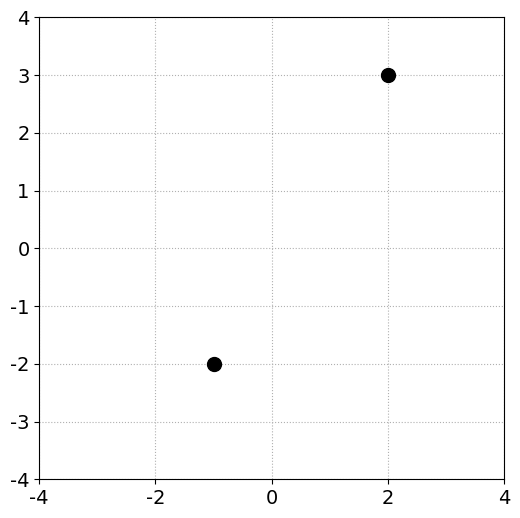

In [47]:
# p1과 p2의 draw 함수를 호출하고, 두 개의 점을 출력함
p1.draw()
p2.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [53]:
# Point의 자식 클래스 Circle 정의 1

class Circle1(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r

    # 이 단계에서 draw 함수는 정의하지 않음

In [54]:
# Circle1 클래스에서 인스턴스 변수 c1_1을 생성
c1_1 = Circle1(1, 0, 2)

In [55]:
# c1_1의 속성 확인
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

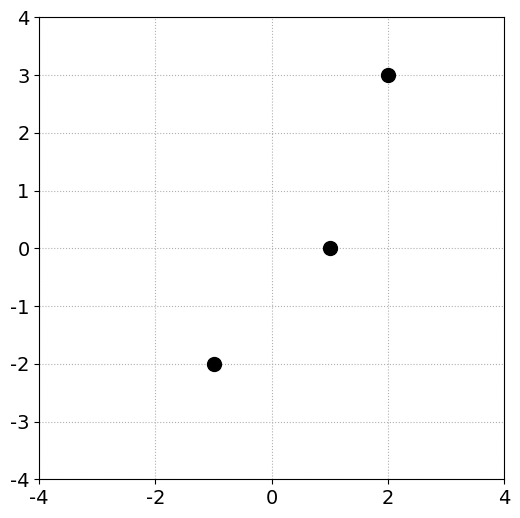

In [56]:
# p1, p2, c1_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

이 단계에서 draw 함수는 부모쪽에서 정의한 함수가 호출되고 있음을 알 수 있다.

In [57]:
# Point의 자식 클래스 Circle의 정의 2

class Circle2(Point):
    # Circle은 인스턴스 생성 시에 인수x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r

    # draw 함수는 자식 클래스만 따로 원을 그림
    def draw(self):
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [58]:
# Circle2 클래스로부터 인스턴스 변수 c2_1을 생성
c2_1 = Circle2(1, 0, 2)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

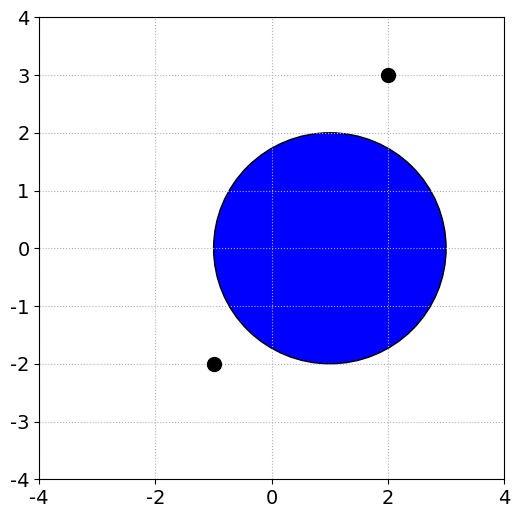

In [59]:
# p1, p2, c2_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

부모의 draw 함수 대신 자식의 draw 함수가 호출되었음을 알 수 있다.
그럼, 이 함수와 부모 함수를 모두 호출하고 싶을 때는 어떻게 해야 하는가.

In [ ]:
# Point의 자식 클래스 Circle의 정의 3

class Circle3(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r

    # Circle의 draw 함수는 부모의 함수를 호출한 다음, 원 그리기를 독자적으로 수행함
    def draw(self):
        # 부모 클래스의 draw 함수 호출
        super().draw()

        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [ ]:
# Circle3 클래스로부터 인스턴스 변수 c3_1를 생성
c3_1 = Circle3(1, 0, 2)

In [ ]:
# p1, p2, c3_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## 인스턴스를 함수로 사용하는 방법

In [2]:
# 함수 클래스 H의 정의

class H:
    def __call__(self, x):
        return 2*x**2 + 2

In [ ]:
# h가 함수로 동작하는지 확인

# 넘파이 배열 x를 정의
x = np.arange(-2, 2.1, 0.25)
print(x)

# H 클래스의 인스턴스로 h를 생성
h = H()

# 함수 h 호출
y = h(x)
print(y)

In [ ]:
# 그래프 출력

plt.plot(x, y)
plt.show()